In [ ]:
# Generate requirements.txt
!pipreqsnb --force --encoding=utf8 cifar4.ipynb

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pickle
import os

print(tf.__version__)

2.13.0


# Download Cifar10 dataset

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Examples of our interest classes from the whole dataset

Class: 3


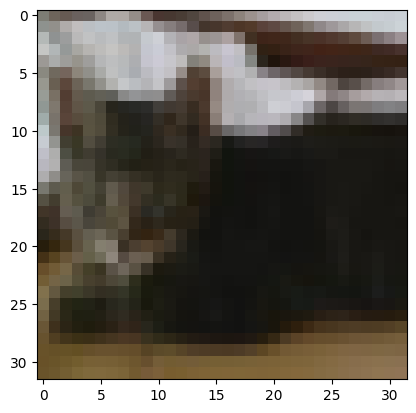

In [16]:
image_id = 9
plt.imshow(x_train[image_id])
print(f"Class: {y_train[image_id][0]}") # 3: Gato

Class: 4


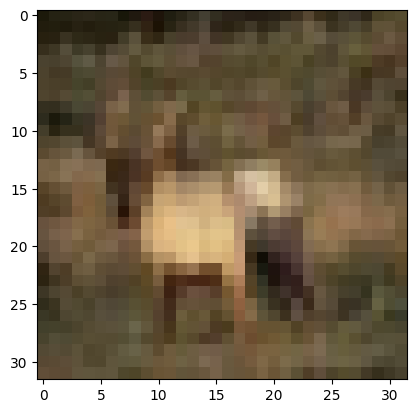

In [19]:
image_id = 3
plt.imshow(x_train[image_id])
print(f"Class: {y_train[image_id][0]}") # 4: Ciervo

Class: 7


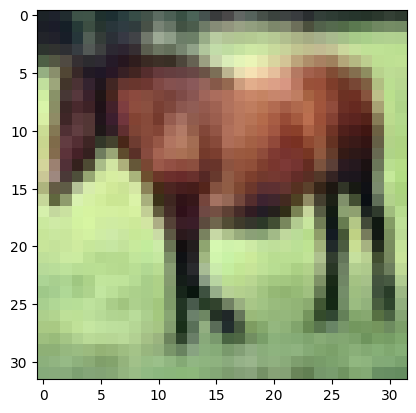

In [23]:
image_id = 7
plt.imshow(x_train[image_id])
print(f"Class: {y_train[image_id][0]}") # 7: Caballo

Class: 5


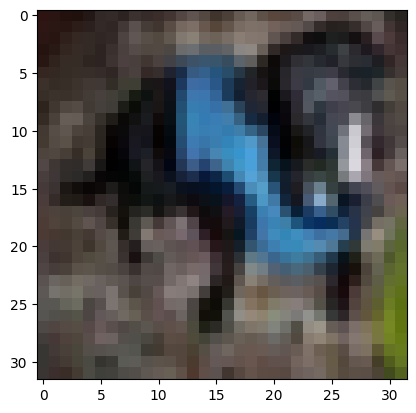

In [43]:
image_id = 27
plt.imshow(x_train[image_id])
print(f"Class: {y_train[image_id][0]}") # 5: Perro

# Transform the dataset into two subsets of classes
Subsets: (cats and dogs) and (deers and horses)

In [9]:
classes = {
    "cat": 3,
    "deer": 4,
    "dog": 5,
    "horse": 7
}

str2label = {
    "cat": 0,
    "dog": 1,
    "deer": 2,
    "horse": 3
}

In [10]:
def subset_cifar10(class_index: int, x_set, y_set):
    index = np.where(y_set.reshape(-1) == class_index)
    return x_set[index], y_set[index]

In [11]:
def rename_class(original_classes: dict, new_classes: dict, dataset):
    for c in original_classes.keys():
        dataset[dataset == original_classes[c]] = new_classes[c]
    return dataset

## Subset cats and dogs

In [6]:
# Train
x_train_cat, y_train_cat = subset_cifar10(classes["cat"], x_train, y_train)
x_test_cat, y_test_cat = subset_cifar10(classes["cat"], x_test, y_test)
x_train_dog, y_train_dog = subset_cifar10(classes["dog"], x_train, y_train)
x_test_dog, y_test_dog = subset_cifar10(classes["dog"], x_test, y_test)

# Test
x_train_cat_dog = np.concatenate((x_train_cat, x_train_dog))
y_train_cat_dog = np.concatenate((y_train_cat, y_train_dog)).reshape(-1,1)
x_test_cat_dog = np.concatenate((x_test_cat, x_test_dog))
y_test_cat_dog = np.concatenate((y_test_cat, y_test_dog)).reshape(-1,1)

# Rename classes
y_train_cat_dog = rename_class(classes, str2label, y_train_cat_dog)
y_test_cat_dog = rename_class(classes, str2label, y_test_cat_dog)

### Examples

Class: 3


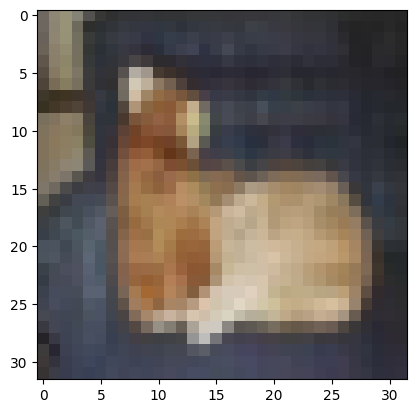

In [61]:
image_id = 1
plt.imshow(x_train_cat_dog[image_id])
print(f"Class: {y_train_cat_dog[image_id][0]}")

Class: 5


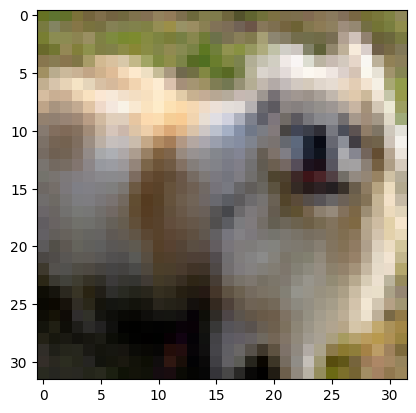

In [67]:
image_id = 5001
plt.imshow(x_train_cat_dog[image_id])
print(f"Class: {y_train_cat_dog[image_id][0]}")

Class: 3


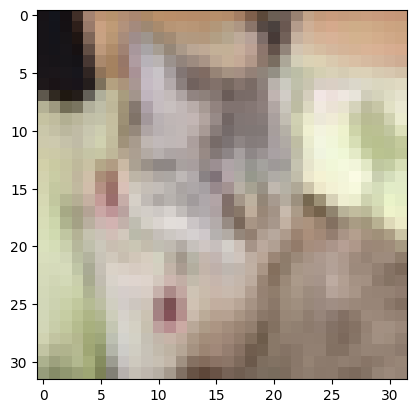

In [68]:
image_id = 1
plt.imshow(x_test_cat_dog[image_id])
print(f"Class: {y_test_cat_dog[image_id][0]}")

Class: 5


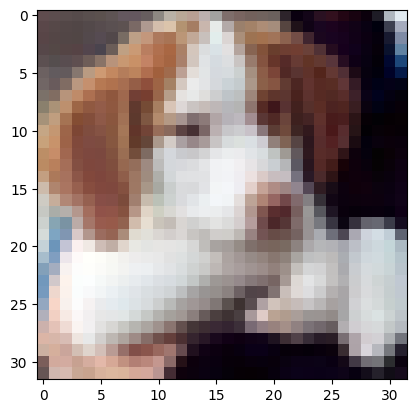

In [70]:
image_id = 1001
plt.imshow(x_test_cat_dog[image_id])
print(f"Class: {y_test_cat_dog[image_id][0]}")

## Subset deers and horses

In [7]:
# Train
x_train_deer, y_train_deer = subset_cifar10(classes["deer"], x_train, y_train)
x_test_deer, y_test_deer = subset_cifar10(classes["deer"], x_test, y_test)
x_train_horse, y_train_horse = subset_cifar10(classes["horse"], x_train, y_train)
x_test_horse, y_test_horse = subset_cifar10(classes["horse"], x_test, y_test)

# Test
x_train_deer_horse = np.concatenate((x_train_deer, x_train_horse))
y_train_deer_horse = np.concatenate((y_train_deer, y_train_horse)).reshape(-1,1)
x_test_deer_horse = np.concatenate((x_test_deer, x_test_horse))
y_test_deer_horse = np.concatenate((y_test_deer, y_test_horse)).reshape(-1,1)

# Rename classes
y_train_deer_horse = rename_class(classes, str2label, y_train_deer_horse)
y_test_deer_horse = rename_class(classes, str2label, y_test_deer_horse)

### Examples

Class: 4


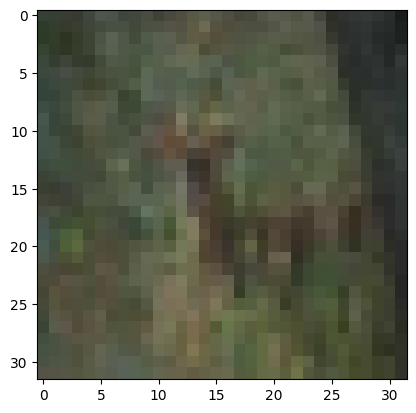

In [72]:
image_id = 1
plt.imshow(x_train_deer_horse[image_id])
print(f"Class: {y_train_deer_horse[image_id][0]}")

Class: 7


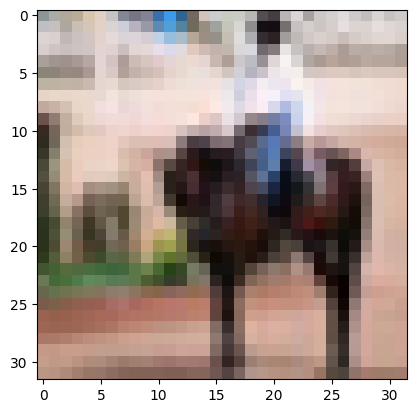

In [73]:
image_id = 5001
plt.imshow(x_train_deer_horse[image_id])
print(f"Class: {y_train_deer_horse[image_id][0]}")

Class: 4


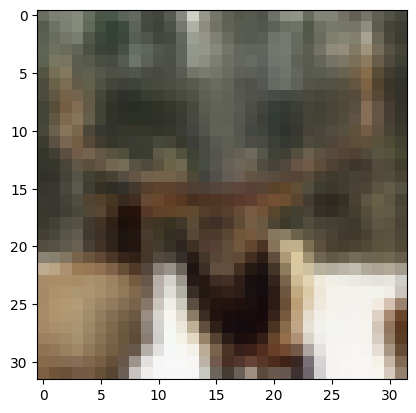

In [77]:
image_id = 1
plt.imshow(x_test_deer_horse[image_id])
print(f"Class: {y_test_deer_horse[image_id][0]}")

Class: 7


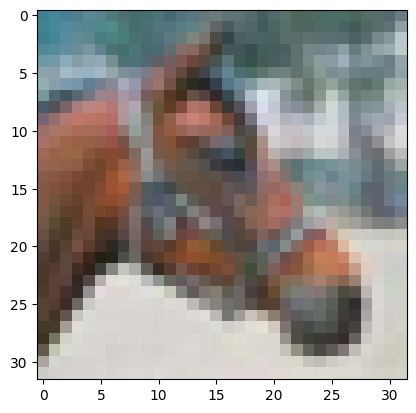

In [78]:
image_id = 1001
plt.imshow(x_test_deer_horse[image_id])
print(f"Class: {y_test_deer_horse[image_id][0]}")

## Subset of the four classes mixed

In [8]:
x_train_mx = np.concatenate((x_train_cat_dog, x_train_deer_horse))
y_train_mx = np.concatenate((y_train_cat_dog, y_train_deer_horse)).reshape(-1,1)
x_test_mx = np.concatenate((x_test_cat_dog, x_test_deer_horse))
y_test_mx = np.concatenate((y_test_cat_dog, y_test_deer_horse)).reshape(-1,1)

# Save subsets

In [9]:
# Check correct shapes
print(x_train_cat_dog.shape, y_train_cat_dog.shape)
print(x_train_deer_horse.shape, y_train_deer_horse.shape)
print(x_train_mx.shape, y_train_mx.shape)

(10000, 32, 32, 3) (10000, 1)
(10000, 32, 32, 3) (10000, 1)
(20000, 32, 32, 3) (20000, 1)


## Shuffle subsets

In [10]:
def shuffle_subset(x_set, y_set):
    assert len(x_set) == len(y_set)
    p = np.random.permutation(len(x_set))
    return x_set[p], y_set[p]

In [11]:
# Shuffle subsets
x_train_cat_dog_s, y_train_cat_dog_s = shuffle_subset(x_train_cat_dog, y_train_cat_dog)
x_test_cat_dog_s, y_test_cat_dog_s = shuffle_subset(x_test_cat_dog, y_test_cat_dog)

x_train_deer_horse_s, y_train_deer_horse_s = shuffle_subset(x_train_deer_horse, y_train_deer_horse)
x_test_deer_horse_s, y_test_deer_horse_s = shuffle_subset(x_test_deer_horse, y_test_deer_horse)

x_train_mx_s, y_train_mx_s = shuffle_subset(x_train_mx, y_train_mx)
x_test_mx_s, y_test_mx_s = shuffle_subset(x_test_mx, y_test_mx)

[[Text(0, 0, 'cat'),
  Text(1, 0, 'dog'),
  Text(2, 0, 'deer'),
  Text(3, 0, 'horse')]]

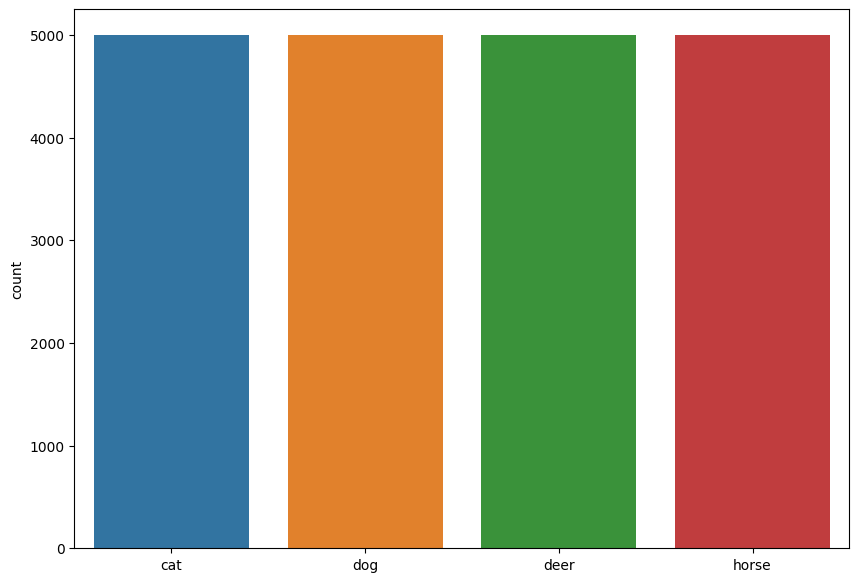

In [164]:
plt.figure(figsize=(10, 7))
p = sns.countplot(x=y_train_mx.flatten())
p.set(xticklabels=list(str2label.keys()))

## Normalize subsets (/255)

In [12]:
x_train_cat_dog_s_n = x_train_cat_dog_s / 255.0
x_test_cat_dog_s_n = x_test_cat_dog_s / 255.0

x_train_deer_horse_s_n = x_train_deer_horse_s / 255.0
x_test_deer_horse_s_n = x_test_deer_horse_s / 255.0

x_train_mx_s_n = x_train_mx_s / 255.0
x_test_mx_s_n = x_test_mx_s / 255.0

## One hot encoding

In [13]:
# oh = one hot encoding
y_train_cat_dog_s_oh = tf.squeeze(tf.one_hot(y_train_cat_dog_s.astype(np.int32), depth=4), axis=1)
y_test_cat_dog_s_oh = tf.squeeze(tf.one_hot(y_test_cat_dog_s.astype(np.int32), depth=4), axis=1)

y_train_deer_horse_s_oh = tf.squeeze(tf.one_hot(y_train_deer_horse_s.astype(np.int32), depth=4), axis=1)
y_test_deer_horse_s_oh = tf.squeeze(tf.one_hot(y_test_deer_horse_s.astype(np.int32), depth=4), axis=1)

y_train_mx_s_oh = tf.squeeze(tf.one_hot(y_train_mx_s.astype(np.int32), depth=4), axis=1)
y_test_mx_s_oh = tf.squeeze(tf.one_hot(y_test_mx_s.astype(np.int32), depth=4), axis=1)

## Save subsets with pickle

In [3]:
root_data_folder = "data_tf"

In [4]:
def save_subset(filename: str, subset):
    with open(f"{root_data_folder}/{filename}.pkl", 'wb') as f:
        pickle.dump(subset, f)

def load_subset(filename: str):
    data = None
    with open(f"{root_data_folder}/{filename}.pkl", 'rb') as f:
        data = pickle.load(f)
    return data

In [16]:
save_subset("x_train_cat_dog_s_n", x_train_cat_dog_s_n)
save_subset("x_test_cat_dog_s_n", x_test_cat_dog_s_n)
save_subset("y_train_cat_dog_s_oh", y_train_cat_dog_s_oh)
save_subset("y_test_cat_dog_s_oh", y_test_cat_dog_s_oh)

save_subset("x_train_deer_horse_s_n", x_train_deer_horse_s_n)
save_subset("x_test_deer_horse_s_n", x_test_deer_horse_s_n)
save_subset("y_train_deer_horse_s_oh", y_train_deer_horse_s_oh)
save_subset("y_test_deer_horse_s_oh", y_test_deer_horse_s_oh)

save_subset("x_train_mx_s_n", x_train_mx_s_n)
save_subset("x_test_mx_s_n", x_test_mx_s_n)
save_subset("y_train_mx_s_oh", y_train_mx_s_oh)
save_subset("y_test_mx_s_oh", y_test_mx_s_oh)

Load subsets if needed.

In [5]:
x_train_cat_dog_s_n = load_subset("x_train_cat_dog_s_n")
x_test_cat_dog_s_n = load_subset("x_test_cat_dog_s_n")
y_train_cat_dog_s_oh = load_subset("y_train_cat_dog_s_oh")
y_test_cat_dog_s_oh = load_subset("y_test_cat_dog_s_oh")

x_train_deer_horse_s_n = load_subset("x_train_deer_horse_s_n")
x_test_deer_horse_s_n = load_subset("x_test_deer_horse_s_n")
y_train_deer_horse_s_oh = load_subset("y_train_deer_horse_s_oh")
y_test_deer_horse_s_oh = load_subset("y_test_deer_horse_s_oh")

x_train_mx_s_n = load_subset("x_train_mx_s_n")
x_test_mx_s_n = load_subset("x_test_mx_s_n")
y_train_mx_s_oh = load_subset("y_train_mx_s_oh")
y_test_mx_s_oh = load_subset("y_test_mx_s_oh")

# Neural Network architecture

In [13]:
learning_rate = 1e-3
batch_size = 32
epochs = 100
root_path = ""

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten

model_name = "cifar10_mx"
num_classes = len(str2label.keys())
input_shape = (32, 32, 3)
model = tf.keras.models.Sequential([
    Conv2D(32, 3, padding='same', input_shape=input_shape, activation='relu'),
    Conv2D(32, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.1),

    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, activation='relu'),
    MaxPooling2D(),
    Dropout(0.1),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.25),
    Dense(num_classes, activation='softmax'),
])

model.summary()

checkpoint_filepath = os.path.join(root_path, f'{model_name}.h5')
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1)

optim = tf.optimizers.AdamW(learning_rate = learning_rate)
# optim = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 15, 15, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        36928     
                                                      

In [214]:
# Test the first (index=0) layer function: conv2d
model.get_layer(index=0)(x_train_mx_s_n[:32])

<tf.Tensor: shape=(32, 32, 32, 32), dtype=float32, numpy=
array([[[[0.25018787, 0.16626698, 0.05802881, ..., 0.29133725,
          0.12375037, 0.        ],
         [0.32457325, 0.25704655, 0.13674927, ..., 0.45095134,
          0.07723934, 0.        ],
         [0.3654404 , 0.25304234, 0.12291029, ..., 0.44313726,
          0.08869667, 0.        ],
         ...,
         [0.5417311 , 0.368252  , 0.22642443, ..., 0.75383645,
          0.13283223, 0.        ],
         [0.55074227, 0.37610245, 0.22294217, ..., 0.76300925,
          0.13358296, 0.        ],
         [0.23598571, 0.34631908, 0.23081997, ..., 0.47145686,
          0.        , 0.        ]],

        [[0.41815025, 0.29844934, 0.2246267 , ..., 0.25561672,
          0.        , 0.        ],
         [0.4171124 , 0.4536128 , 0.17231135, ..., 0.52865773,
          0.        , 0.        ],
         [0.46207657, 0.44280115, 0.20969985, ..., 0.5633038 ,
          0.        , 0.        ],
         ...,
         [0.43673897, 0.557462

In [216]:
# Test the model
model(x_train_mx_s_n[:32])

<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[0.25665894, 0.24576719, 0.25506872, 0.24250515],
       [0.25988692, 0.2409917 , 0.25269336, 0.246428  ],
       [0.26283032, 0.23561032, 0.25055867, 0.25100073],
       [0.26563752, 0.24070737, 0.2506763 , 0.2429788 ],
       [0.26593786, 0.23437232, 0.25511265, 0.24457715],
       [0.27003065, 0.2338882 , 0.2516096 , 0.24447165],
       [0.26717886, 0.23353025, 0.25466937, 0.24462153],
       [0.26256326, 0.23311694, 0.2577412 , 0.24657856],
       [0.2664136 , 0.23898493, 0.25276858, 0.24183291],
       [0.26507312, 0.23760036, 0.2539994 , 0.24332704],
       [0.2619819 , 0.23796889, 0.25823268, 0.24181649],
       [0.26420596, 0.23772617, 0.25310543, 0.2449625 ],
       [0.25863993, 0.24300383, 0.25406697, 0.2442892 ],
       [0.2621438 , 0.23428747, 0.2595982 , 0.24397057],
       [0.26339102, 0.2376888 , 0.25369665, 0.2452235 ],
       [0.25479347, 0.23991269, 0.25500688, 0.2502869 ],
       [0.2602023 , 0.2405446 , 0.25357

In [ ]:
history = model.fit(
    x_train_mx_s_n, y_train_mx_s_oh, 
    batch_size = batch_size, 
    epochs = epochs, 
    validation_data = (x_test_mx_s_n, y_test_mx_s_oh), 
    shuffle = False,
    callbacks = [model_checkpoint])

In [228]:
# Get object from memory address:
#  import ctypes
#  history = ctypes.cast(0x143c4a1a160, ctypes.py_object).value

In [19]:
# Load model
checkpoint_filepath = os.path.join(root_path, f'{model_name}_pre_manual_shuffle.h5')
model.load_weights(checkpoint_filepath)

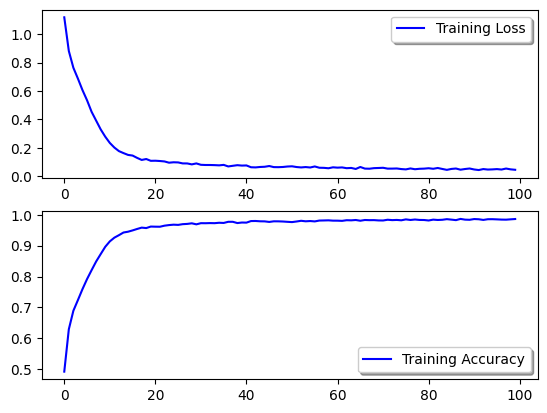

In [230]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

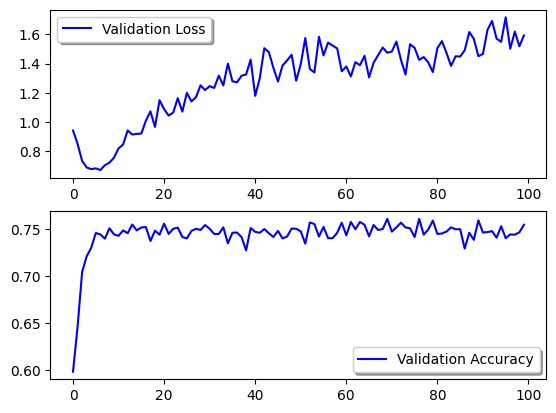

In [231]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['val_loss'], color='b', label="Validation Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['val_accuracy'], color='b', label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [21]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test_mx_s_n)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test_mx_s_oh, axis=1)
# compute the confusion matrix
confusion_matrix = tf.math.confusion_matrix(y_true, y_pred_classes, num_classes=len(str2label.keys()))

125/125 [==============================] - 2s 16ms/step


[[Text(0.5, 0, 'cat'),
  Text(1.5, 0, 'dog'),
  Text(2.5, 0, 'deer'),
  Text(3.5, 0, 'horse')],
 [Text(0, 0.5, 'cat'),
  Text(0, 1.5, 'dog'),
  Text(0, 2.5, 'deer'),
  Text(0, 3.5, 'horse')]]

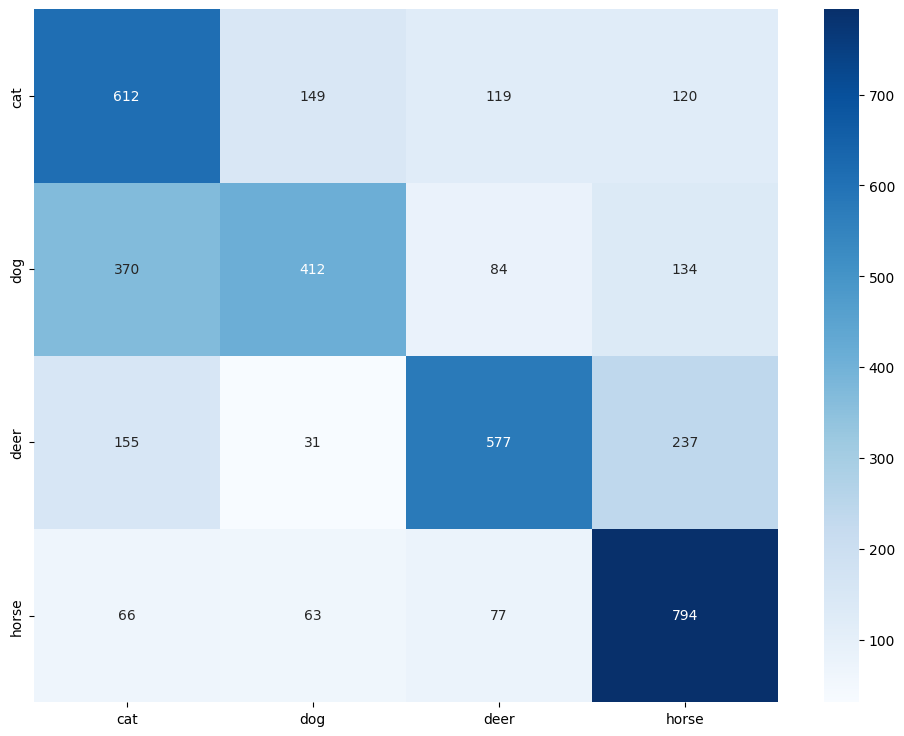

In [25]:
# rows -> real labels; cols -> predicted labels;
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
c.set(xticklabels=str2label.keys(), yticklabels=str2label.keys())

[[Text(0.5, 0, 'cat'),
  Text(1.5, 0, 'dog'),
  Text(2.5, 0, 'deer'),
  Text(3.5, 0, 'horse')],
 [Text(0, 0.5, 'cat'),
  Text(0, 1.5, 'dog'),
  Text(0, 2.5, 'deer'),
  Text(0, 3.5, 'horse')]]

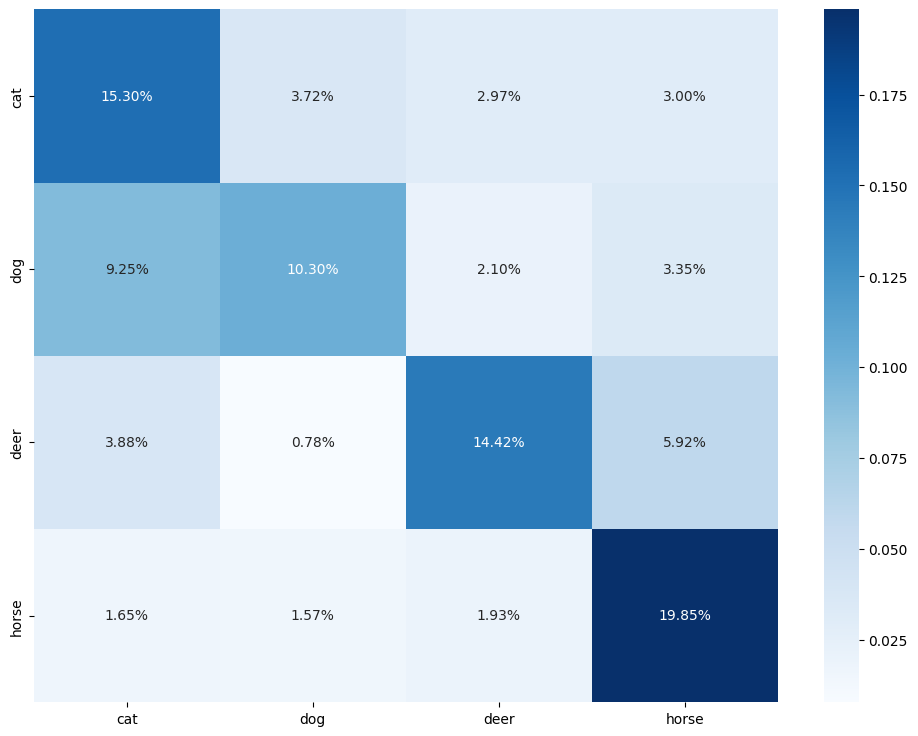

In [24]:
# rows -> real labels; cols -> predicted labels;
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, fmt='.2%', cmap='Blues')
c.set(xticklabels=str2label.keys(), yticklabels=str2label.keys())

# PyTorch version

In [2]:
import torch
from torch import nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torchsummary import summary
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import confusion_matrix
from datetime import datetime
from torch.utils.tensorboard import SummaryWriter

In [3]:
class CIFAR4Model(nn.Module):
    def __init__(self, num_classes=4):
        super(CIFAR4Model, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.maxpool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.1)
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3)
        self.maxpool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.1)

        self.fc1 = nn.Linear(64*6*6, 512)
        self.dropout3 = nn.Dropout(0.25)
        self.fc2 = nn.Linear(512, num_classes)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = self.dropout1(x)
        
        x = self.conv3(x)
        x = self.relu(x)
        x = self.conv4(x)
        x = self.relu(x)
        x = self.maxpool2(x)
        x = self.dropout2(x)

        x = x.view(-1, 64*6*6)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout3(x)
        x = self.fc2(x)
        x = self.softmax(x)

        return x

# model = CIFAR4Model(num_classes=len(str2label.keys()))
# optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
# criterion = nn.CrossEntropyLoss()

In [5]:
batch_size = 64
learning_rate = 1e-3

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = CIFAR4Model().to(device)
# criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
class_indices = [classes.index(cls) for cls in ['cat', 'dog', 'deer', 'horse']]

def filter_classes_and_normalize(dataset, class_indices):
    class_indices = set(class_indices)
    indices = [i for i, (_, label) in enumerate(dataset) if label in class_indices]
    dataset.data = dataset.data[indices]
    dataset.targets = np.array(dataset.targets, dtype='int64')[indices]


filter_classes_and_normalize(trainset, class_indices)
filter_classes_and_normalize(testset, class_indices)

def remap_labels(dataset, class_indices):
    class_indices = {cls: i for i, cls in enumerate(class_indices)}
    dataset.targets = np.array([class_indices[label] for label in dataset.targets], dtype='int64')

# remap_labels(trainset, class_indices)
# remap_labels(testset, class_indices)

# Create dataloaders
dataloaders = {}
dataloaders['train'] = DataLoader(trainset, batch_size=batch_size, shuffle=True)
dataloaders['val'] = DataLoader(testset, batch_size=batch_size, shuffle=False)
dataset_sizes = {x: len(dataloaders[x].dataset) for x in ['train', 'val']}

Files already downloaded and verified
Files already downloaded and verified


[[Text(0, 0, 'cat'),
  Text(1, 0, 'dog'),
  Text(2, 0, 'deer'),
  Text(3, 0, 'horse')]]

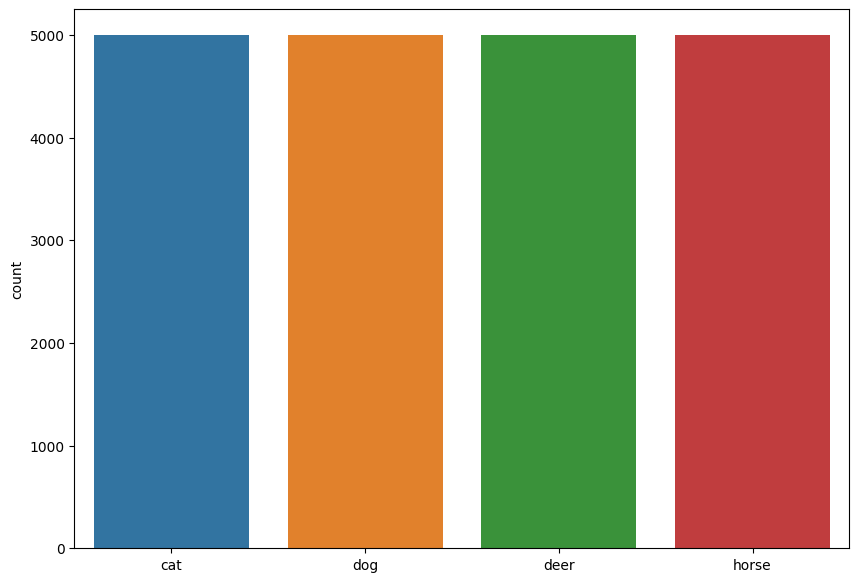

In [9]:
plt.figure(figsize=(10, 7))
p = sns.countplot(x=trainset.targets)
p.set(xticklabels=list(str2label.keys()))

In [36]:
# trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
# testset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

# classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# class_indices = [classes.index(cls) for cls in ['cat', 'dog', 'deer', 'horse']]

# def remap_labels(dataset, class_indices):
#     class_indices = {cls: i for i, cls in enumerate(class_indices)}
#     dataset.targets = np.array([class_indices[label] for label in dataset.targets], dtype='int64')

# remap_labels(trainset, class_indices)
# remap_labels(testset, class_indices)

def filter_classes_and_normalize(dataset, class_indices, class_counts):
    class_indices = set(class_indices)
    class_count = {k: 0 for k in class_indices}
    indices = []
    for i, (_, label) in enumerate(dataset):
        if label in class_indices and class_count[label] < class_counts.get(label, 0):
            indices.append(i)
            class_count[label] += 1
    dataset.data = dataset.data[indices]
    dataset.targets = np.array(dataset.targets, dtype='int64')[indices]


filter_classes_and_normalize(trainset, class_indices, {classes.index('cat'): 5000, classes.index('dog'): 5000})
filter_classes_and_normalize(testset, class_indices, {classes.index('cat'): 500, classes.index('dog'): 500, classes.index('deer'): 500, classes.index('horse'): 500})


In [41]:
# np.unique(trainset.targets)
len(trainset.targets)

def remap_labels(dataset, class_indices):
    class_indices = {cls: i for i, cls in enumerate(class_indices)}
    dataset.targets = np.array([class_indices[label] for label in dataset.targets], dtype='int64')

remap_labels(trainset, class_indices)
remap_labels(testset, class_indices)

print(np.unique(trainset.targets))

[0 1]


[[Text(0, 0, 'cat'),
  Text(1, 0, 'dog'),
  Text(2, 0, 'deer'),
  Text(3, 0, 'horse')]]

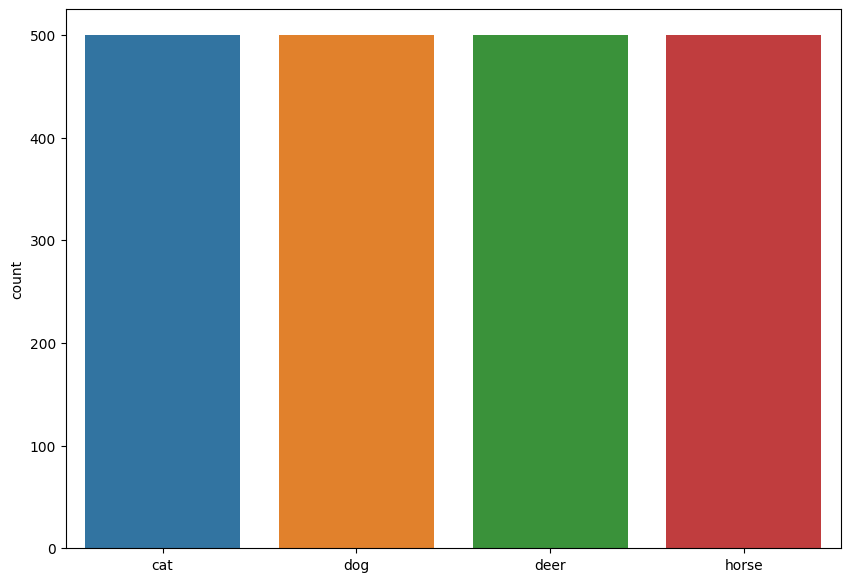

In [40]:
plt.figure(figsize=(10, 7))
p = sns.countplot(x=testset.targets)
p.set(xticklabels=list(str2label.keys()))

In [42]:
dataloaders = {}
dataloaders['train'] = DataLoader(trainset, batch_size=batch_size, shuffle=True)
dataloaders['val'] = DataLoader(testset, batch_size=batch_size, shuffle=False)

In [63]:
training_loader = dataloaders['train']
validation_loader = dataloaders['val']
def train_one_epoch(epoch_index, tb_writer):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    j = int(len(training_loader) / 10)
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = criterion(outputs, labels.long())
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % j == j - 1:
            last_loss = running_loss / j # loss per batch
            # print('  batch {} loss: {}'.format(i + 1, last_loss))
            tb_x = epoch_index * len(training_loader) + i + 1
            tb_writer.add_scalar('Loss/train', last_loss, tb_x)
            running_loss = 0.

    return last_loss

In [ ]:

timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/trainer_{}'.format(timestamp))
epoch_number = 0
EPOCHS = 20

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train()
    avg_loss = train_one_epoch(epoch_number, writer)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(validation_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = criterion(voutputs, vlabels.long())
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Log the running loss averaged per batch
    # for both training and validation
    writer.add_scalars('Training vs. Validation Loss',
                    { 'Training' : avg_loss, 'Validation' : avg_vloss },
                    epoch_number + 1)
    writer.flush()

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = f'model_{epoch_number}'
        torch.save(model.state_dict(), model_path)

    epoch_number += 1